# グラフ探索アルゴリズム

ここではグラフ探索アルゴリズム，特に深さ優先探索と幅優先探索を紹介する．

まず，グラフおよび描画用のモジュールをimportする．

In [1]:
import networkx as nx # networkxはグラフアルゴリズムおよび描画のモジュールである．
import matplotlib.pyplot as plt # matplotlibはMATLAB風描画モジュールである．

9頂点の無向グラフをGとして以下で用意する．

In [2]:
G = nx.Graph()
for i in range(1, 10):
    G.add_node(i, position=((i - 1) % 3, 2 - (i - 1) // 3))
G.add_edge(1, 2)
G.add_edge(1, 4)
G.add_edge(2, 3)
G.add_edge(2, 5)
G.add_edge(3, 6)
G.add_edge(4, 5)
G.add_edge(4, 7)
G.add_edge(5, 6)
G.add_edge(5, 8)
G.add_edge(7, 8)

Gを図で確認すると以下の通りである．

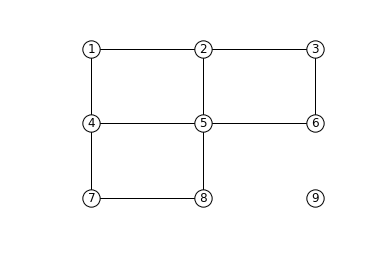

In [3]:
%matplotlib inline
fig, ax = plt.subplots()
ax.set_axis_off()
nx.draw_networkx(G, pos=nx.get_node_attributes(G, 'position'), with_labels=True, node_color='w')

## 深さ優先でも幅優先でもない単なるグラフ探索アルゴリズム

グラフ探索アルゴリズムを関数graph_scanningとして以下に定義する．

In [4]:
def graph_scanning(G, s):
    C = set([s])
    S = set([s])
    while len(S) > 0:
        v = S.pop()
        for w in G.neighbors_iter(v):
            if w not in C:
                C |= set([w])
                S |= set([w])
    return C

早速，先程用意した無向グラフGで実行してみる．

In [5]:
G.nodes()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
graph_scanning(G, 1)

{1, 2, 3, 4, 5, 6, 7, 8}

In [7]:
graph_scanning(G, 9)

{9}

上手く行っているようである．

実際にどのように探索されているのか，その過程を図示して観察する．

以下に，描画用の関数draw_processを定義し，それを利用して関数graph_scanningを再定義する．

In [8]:
def draw_process(G, stage, C, S, v=False):
    total_stages = len(G.nodes()) * 2 + 2
    plt.subplot(total_stages // 3 + 1, 3, stage)
    p = nx.get_node_attributes(G, 'position')
    if v == False:
        plt.title('stage %d, C = %s, S = %s' % (stage, C, S))
    else:
        plt.title('stage %d, C = %s, S = %s, v = %s' % (stage, C, S, v))
    nx.draw_networkx(G, pos=p, with_labels=True, node_color='w')
    nx.draw_networkx_nodes(G, pos=p, nodelist=C-set(S)-set([v]), node_color='b', alpha=0.25)
    nx.draw_networkx_nodes(G, pos=p, nodelist=S, node_color='y', alpha=0.25)
    if v != False:
        nx.draw_networkx_nodes(G, pos=p, nodelist=set([v]), node_color='r', alpha=0.25)
    return stage + 1


def graph_scanning(G, s, draw=False):
    C = set([s])
    S = set([s])
    if draw: stage = draw_process(G, 1, C, S) # 経過描画
    while len(S) > 0:
        v = S.pop()
        if draw: stage = draw_process(G, stage, C, S, v) # 経過描画
        for w in G.neighbors_iter(v):
            if w not in C:
                C |= set([w])
                S |= set([w])
        if draw: stage = draw_process(G, stage, C, S, v) # 経過描画
    if draw: stage = draw_process(G, stage, C, S) # 経過描画
    return C

再び，グラフGで実行してみる．

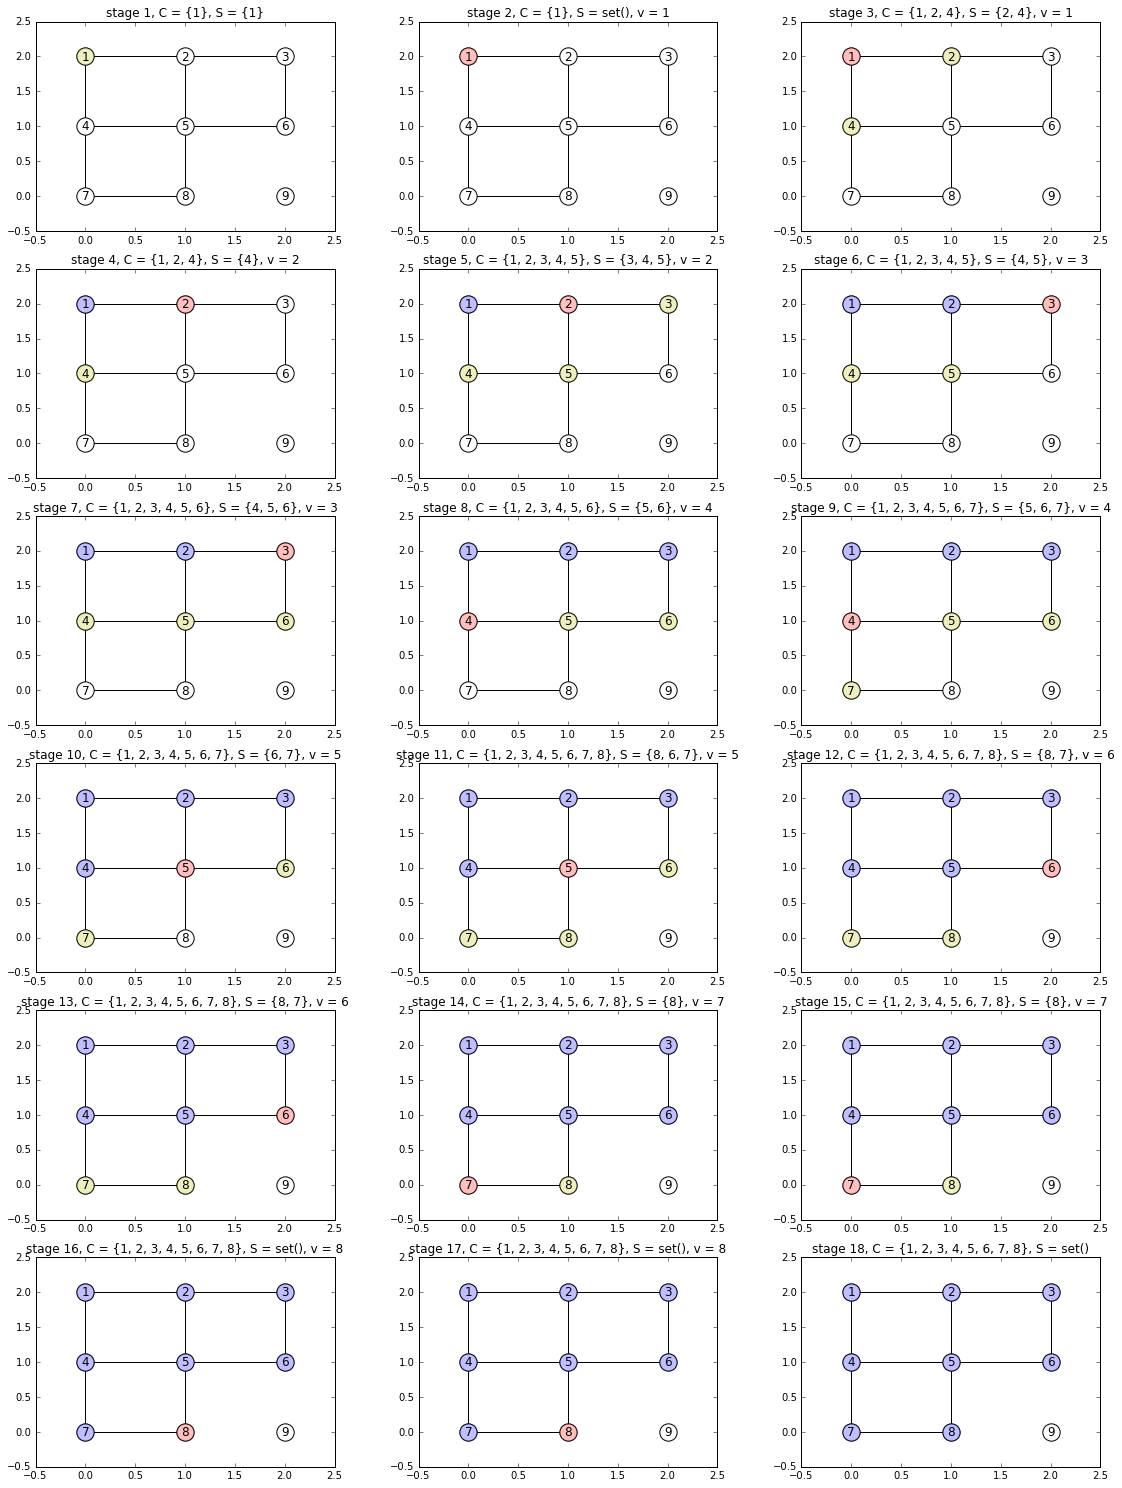

In [9]:
%matplotlib inline
plt.figure(figsize=(16, 4*6))
graph_scanning(G, 1, draw=True)
plt.tight_layout()

「次に訪れたい頂点」のうちどれが次に選ばれるかは，関数graph_scanningでは指定されていない．
今回はPythonのデータ構造setの特性により，辞書順に小さい順（すなわち数字の小さい順）に選ばれているようである．

## 深さ優先探索（Depth First Search）

In [10]:
def stack_dfs(G, s, draw=False):
    C = set([s])
    S = [s] # SをスタックにしたのでSはリスト
    if draw: stage = draw_process(G, 1, C, S) # 経過描画
    while len(S) > 0:
        v = S.pop() # リストの最後，すなわち最後に加えた要素（頂点）を取り出す．
        if draw: stage = draw_process(G, stage, C, S, v) # 経過描画
        for w in G.neighbors_iter(v):
            if w not in C:
                C |= set([w])
                S.append(w) # Sをリストにして一番後ろに追加
        if draw: stage = draw_process(G, stage, C, S, v) # 経過描画
    if draw: stage = draw_process(G, stage, C, S) # 経過描画
    return C

In [11]:
stack_dfs(G, 1)

{1, 2, 3, 4, 5, 6, 7, 8}

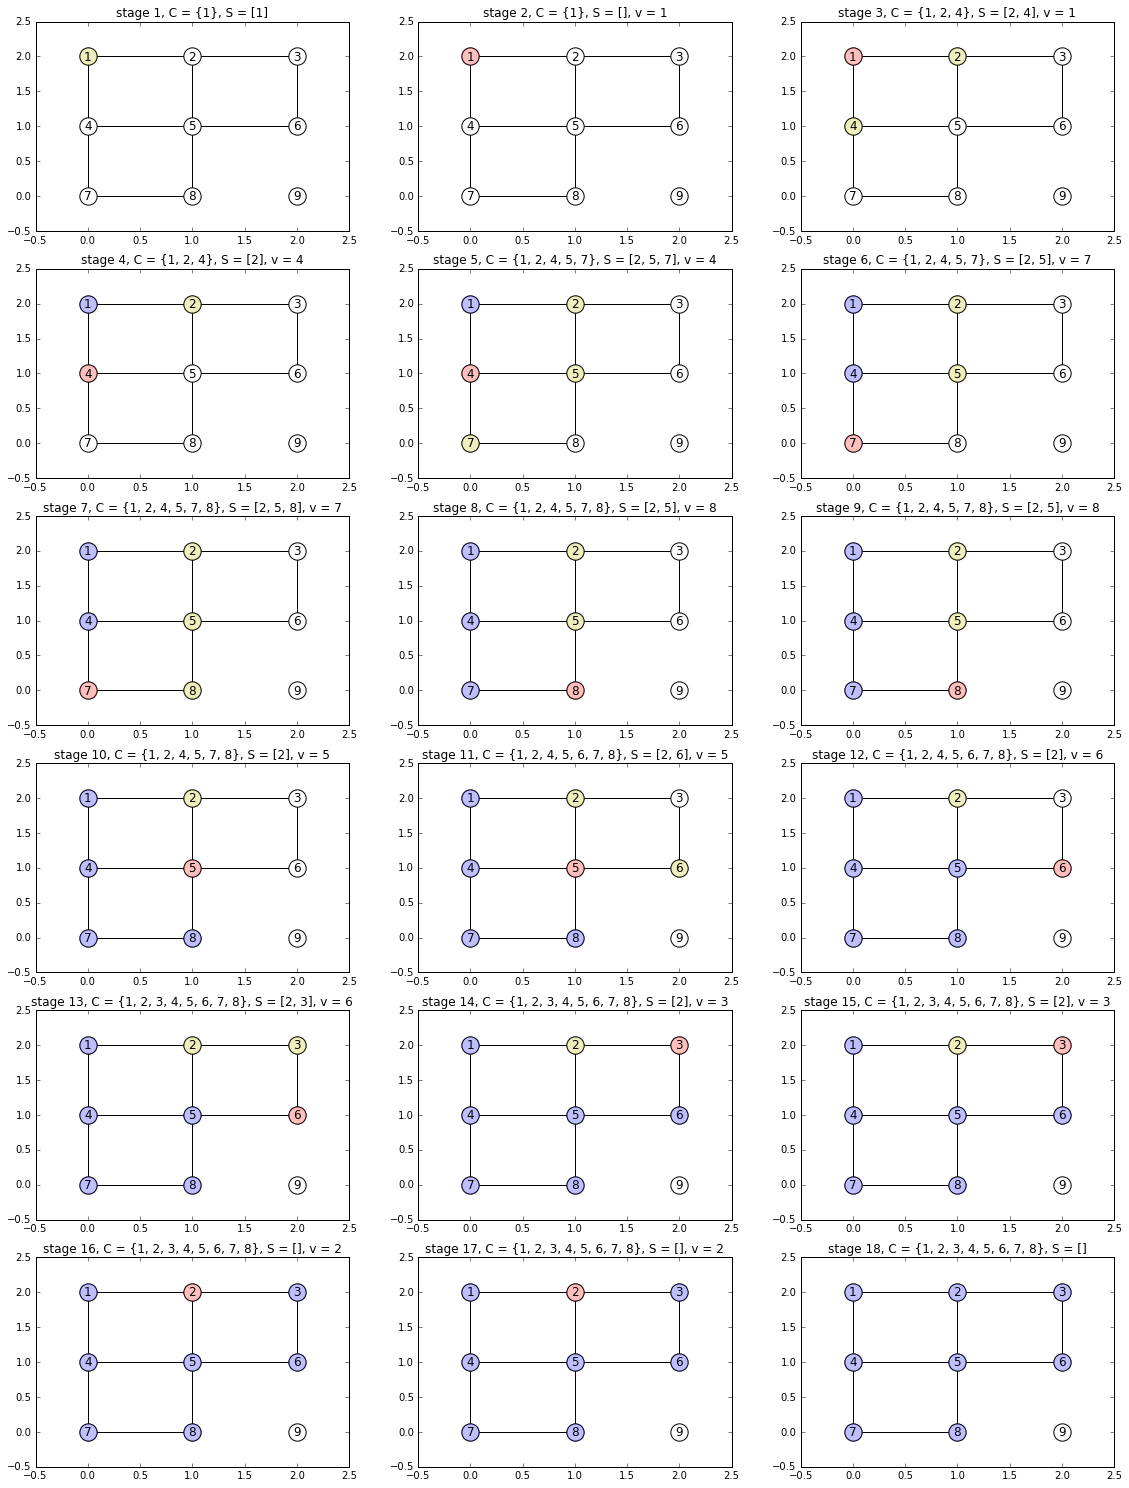

In [12]:
%matplotlib inline
plt.figure(figsize=(16, 4*6))
stack_dfs(G, 1, draw=True)
plt.tight_layout()

In [13]:
def bfs(G, s, draw=False):
    C = set([s])
    S = [s] # SをキューにしたのでSはリスト
    if draw: stage = draw_process(G, 1, C, S) # 経過描画
    while len(S) > 0:
        v = S.pop(0) # Sをキューにしたので，先頭を取り出す
        if draw: stage = draw_process(G, stage, C, S, v) # 経過描画
        for w in G.neighbors_iter(v):
            if w not in C:
                C |= set([w])
                S.append(w) # Sをリストにして一番後ろに追加
        if draw: stage = draw_process(G, stage, C, S, v) # 経過描画
    if draw: stage = draw_process(G, stage, C, S) # 経過描画
    return C

In [14]:
bfs(G, 1)

{1, 2, 3, 4, 5, 6, 7, 8}

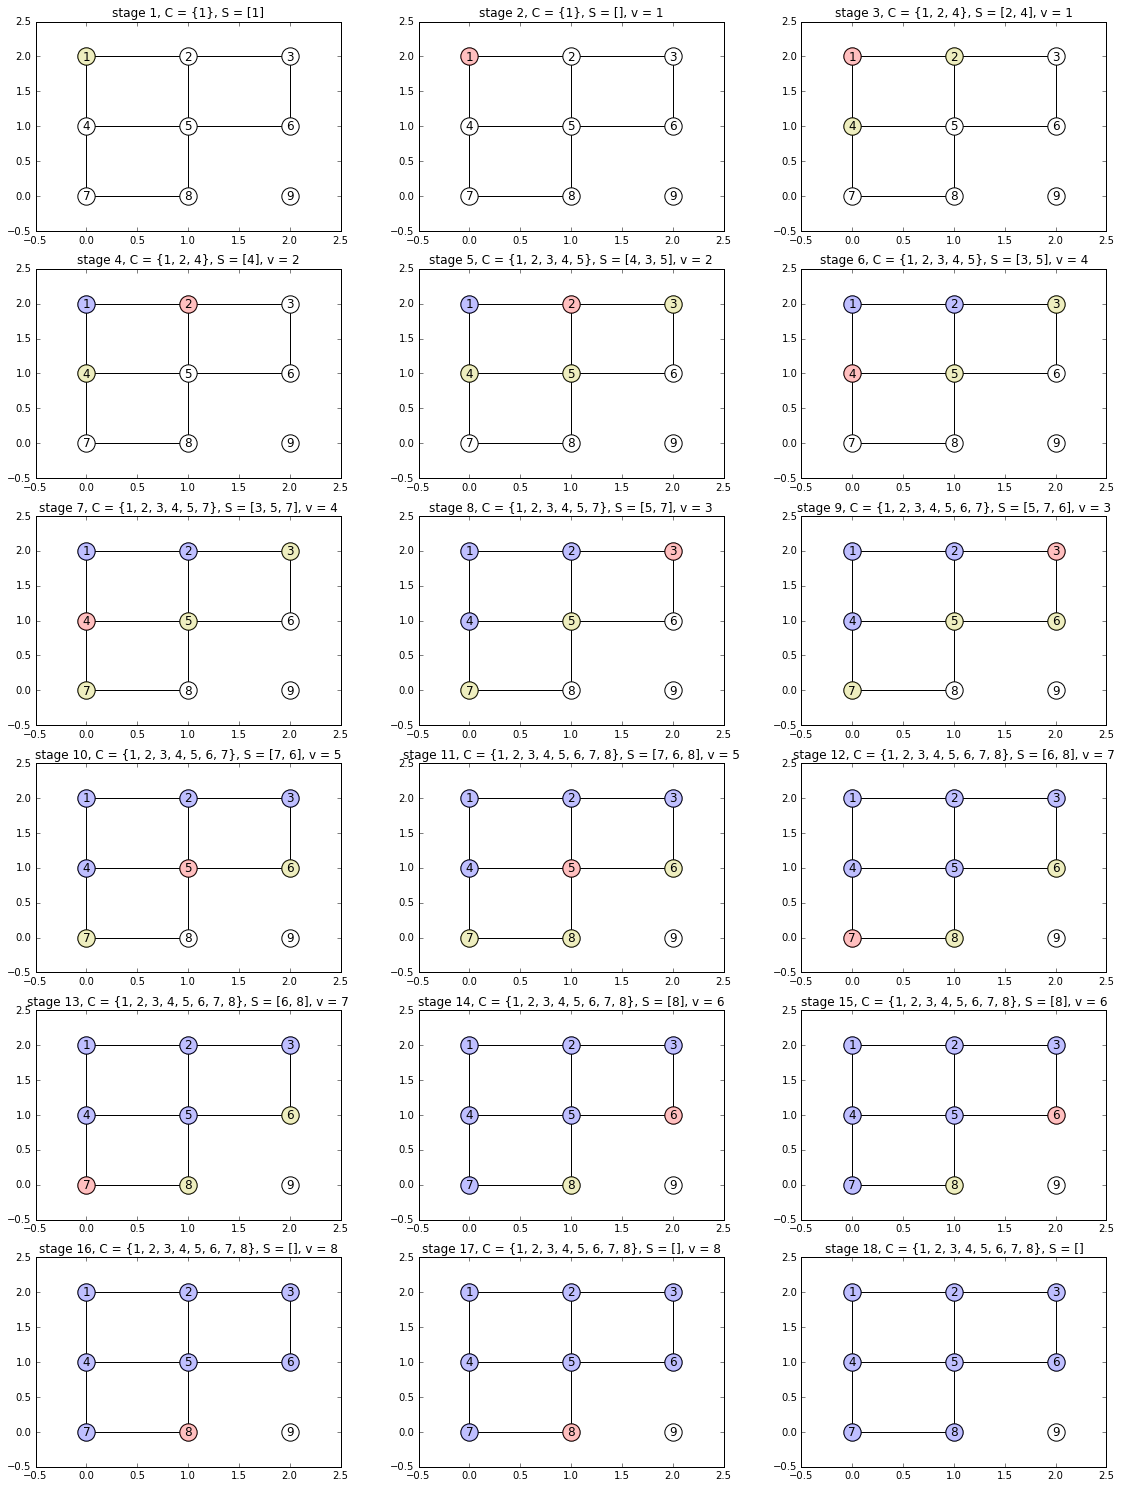

In [15]:
%matplotlib inline
plt.figure(figsize=(16, 4*6))
bfs(G, 1, draw=True)
plt.tight_layout()

In [16]:
T = G.copy()
T.remove_edge(2, 5)
T.remove_edge(4, 5)
T.remove_edge(5, 6)
T.remove_edge(5, 8)
T.add_edge(1, 5)
T.add_edge(5, 9)

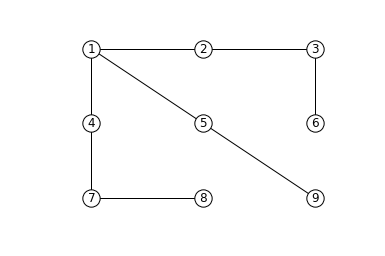

In [17]:
%matplotlib inline
fig, ax = plt.subplots()
ax.set_axis_off()
nx.draw_networkx(T, pos=nx.get_node_attributes(T, 'position'), with_labels=True, node_color='w')

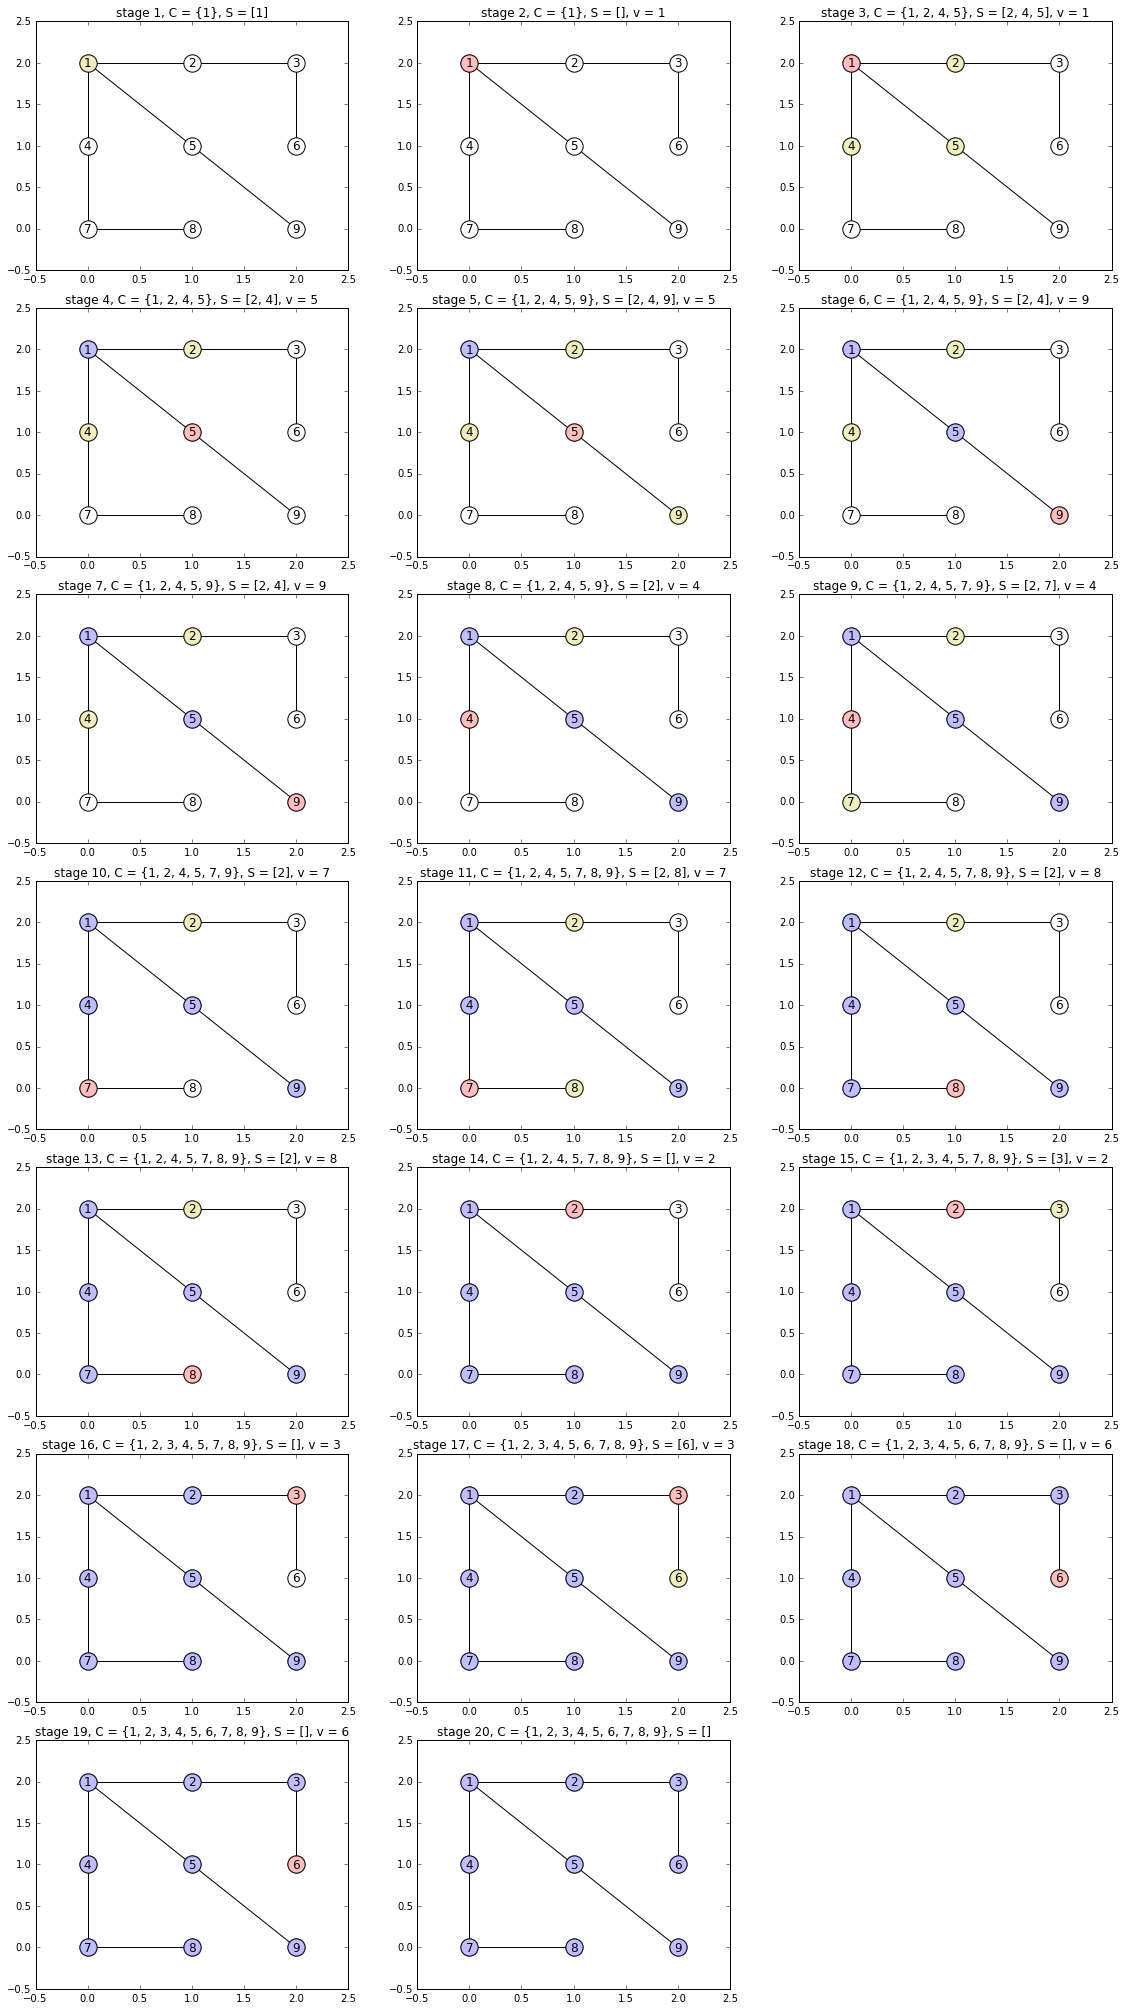

In [18]:
%matplotlib inline
plt.figure(figsize=(16, 4*7))
stack_dfs(T, 1, draw=True)
plt.tight_layout()

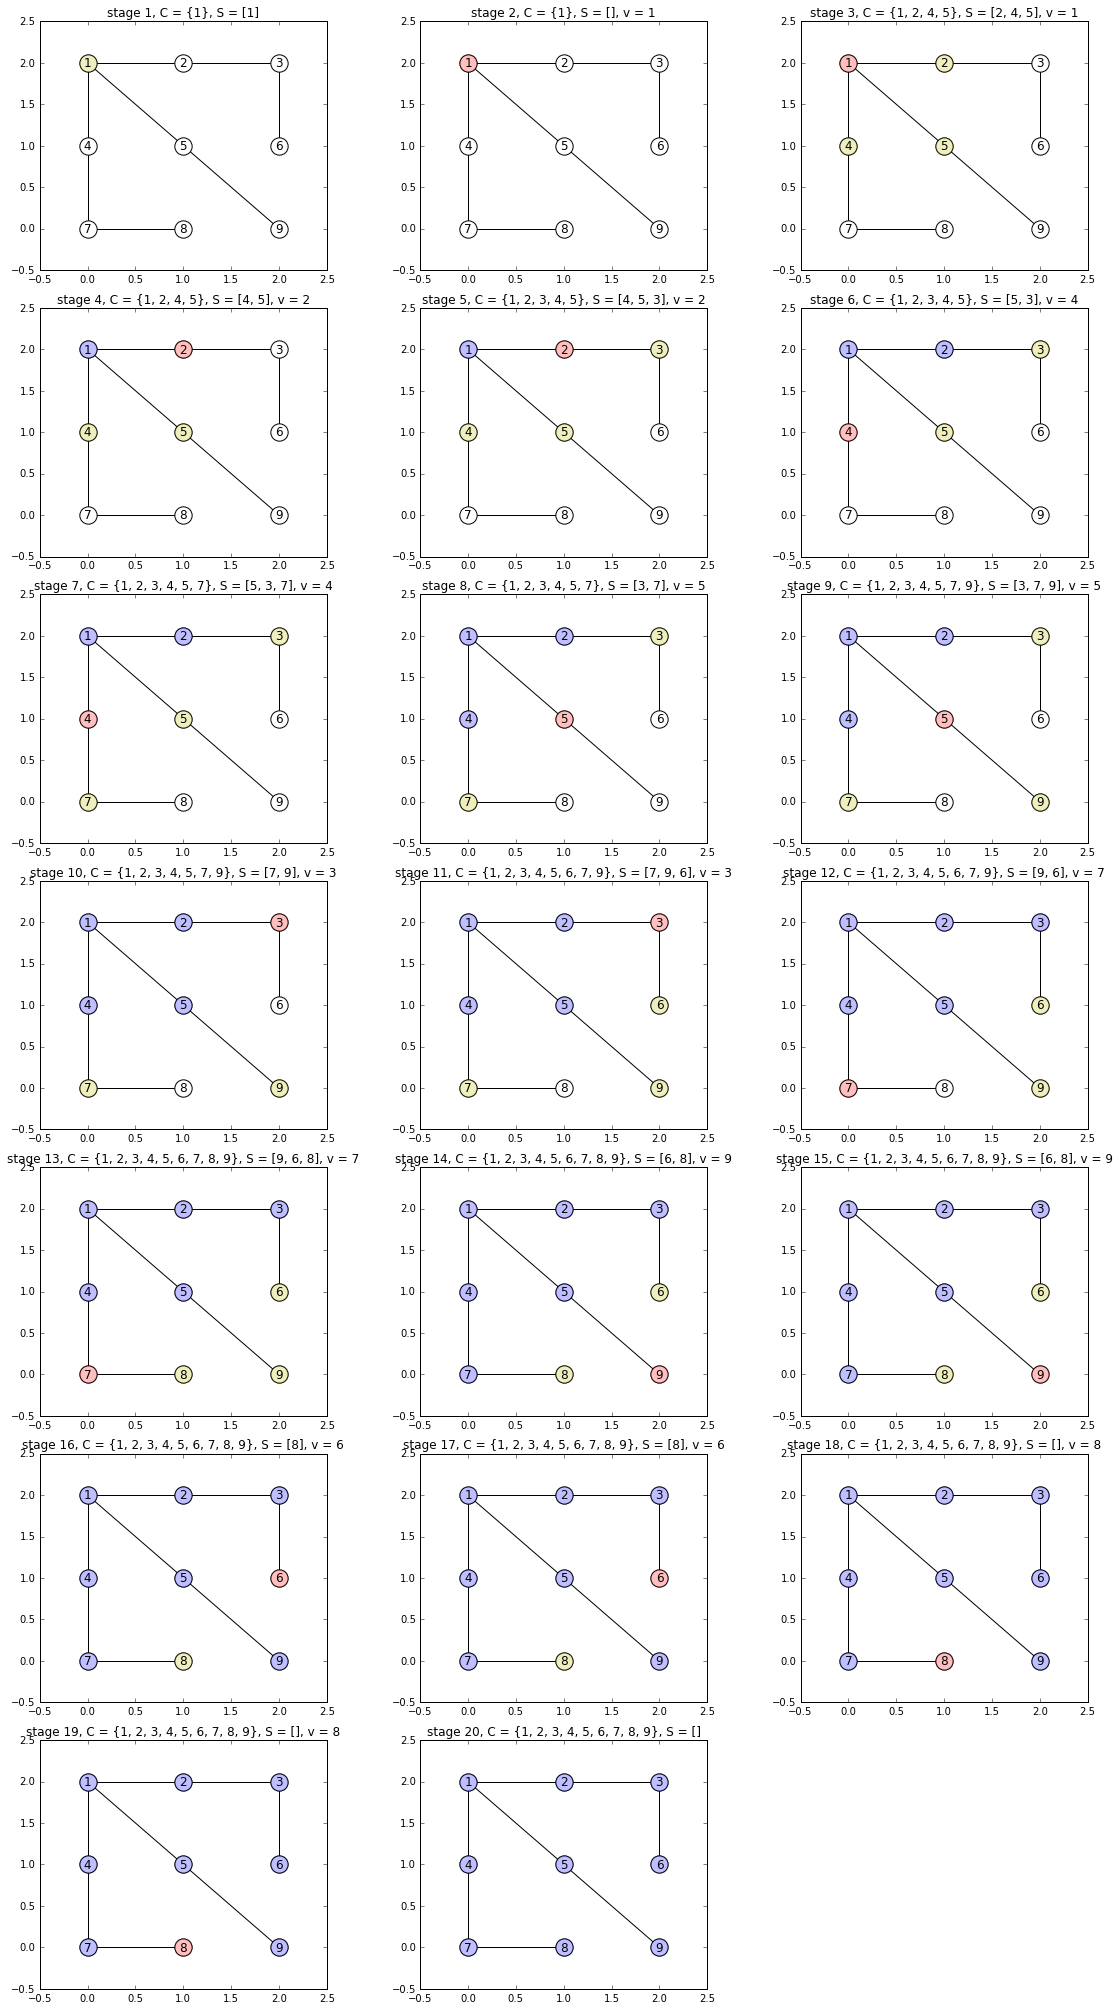

In [19]:
%matplotlib inline
plt.figure(figsize=(16, 4*7))
bfs(T, 1, draw=True)
plt.tight_layout()

In [20]:
G2 = G.to_directed()
G2.remove_edge(2, 1)
G2.remove_edge(2, 5)
G2.remove_edge(3, 2)
G2.remove_edge(4, 1)
G2.remove_edge(4, 5)
G2.remove_edge(6, 3)
G2.remove_edge(6, 5)
G2.remove_edge(7, 4)
G2.remove_edge(8, 5)
G2.remove_edge(8, 7)
G2.add_edge(6, 9)
G2.add_edge(8, 9)

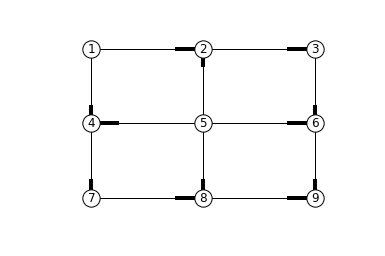

In [21]:
%matplotlib inline
fig, ax = plt.subplots()
ax.set_axis_off()
nx.draw_networkx(G2, pos=nx.get_node_attributes(G2, 'position'), with_labels=True, node_color='w')

In [22]:
def graph_shoretst_path(G, s, draw=False):
    C = set([s])
    S = [s] # SをキューにしたのでSはリスト
    d = {s: 0} # 最短路用に，BFSから新たに加わった部分
    if draw: stage = draw_process(G, 1, C, S) # 経過描画
    while len(S) > 0:
        v = S.pop(0) # Sをキューにしたので，先頭を取り出す
        if draw: stage = draw_process(G, stage, C, S, v) # 経過描画
        for w in G.neighbors_iter(v):
            if w not in C:
                C |= set([w])
                S.append(w) # Sをリストにして一番後ろに追加
                if w not in d: # 最短路用に，BFSから新たに加わった部分
                    d[w] = d[v] + 1 # 最短路用に，BFSから新たに加わった部分
        if draw: stage = draw_process(G, stage, C, S, v) # 経過描画
    if draw: stage = draw_process(G, stage, C, S) # 経過描画
    return d # 今度は，始点から到達可能な頂点集合ではなく，始点からの距離を出力

In [23]:
graph_shoretst_path(G2, 1)

{1: 0, 2: 1, 3: 2, 4: 1, 6: 3, 7: 2, 8: 3, 9: 4}

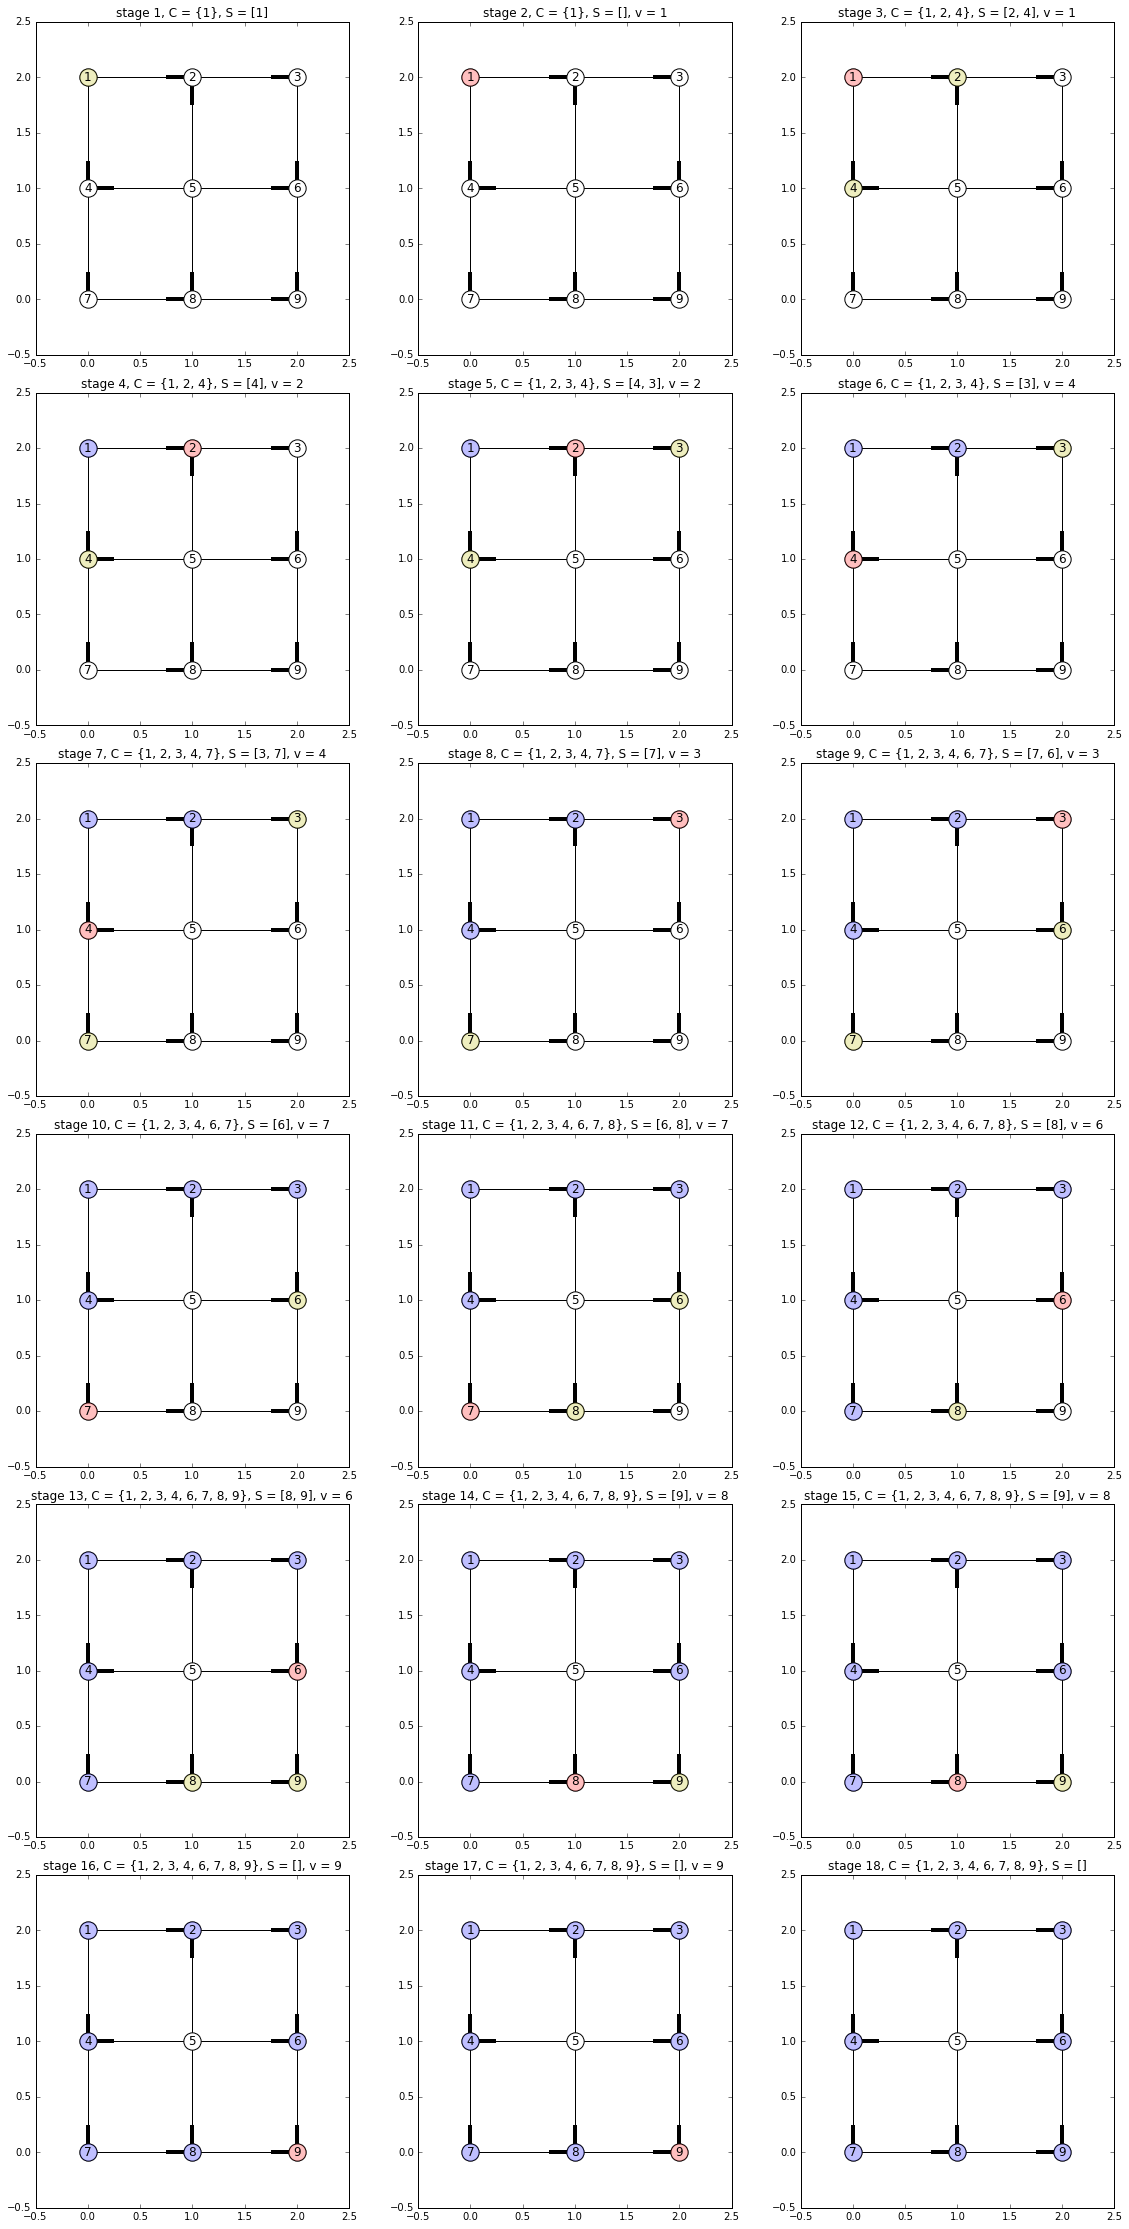

In [24]:
%matplotlib inline
plt.figure(figsize=(16, 4*9))
graph_shoretst_path(G2, 1, draw=True)
plt.tight_layout()